#Visualizing my customized CNN for cifar100

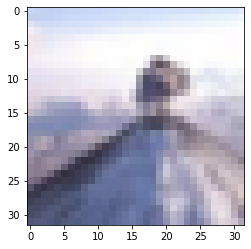

(32, 32, 3)
(1, 30, 30, 32)


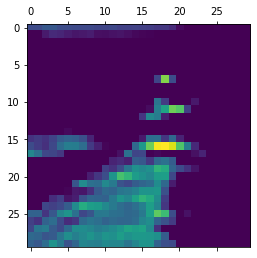

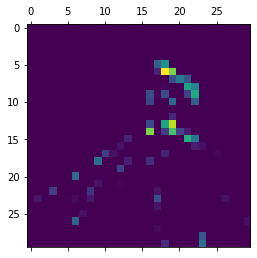

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide


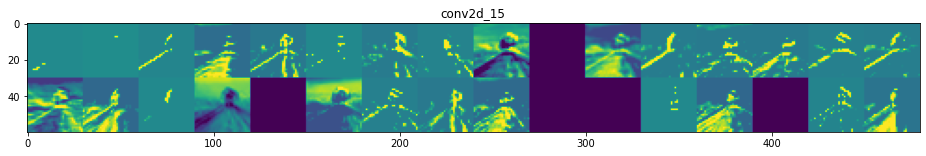

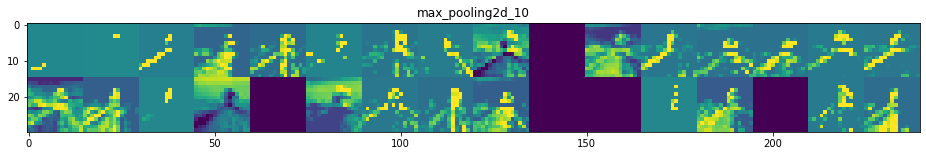

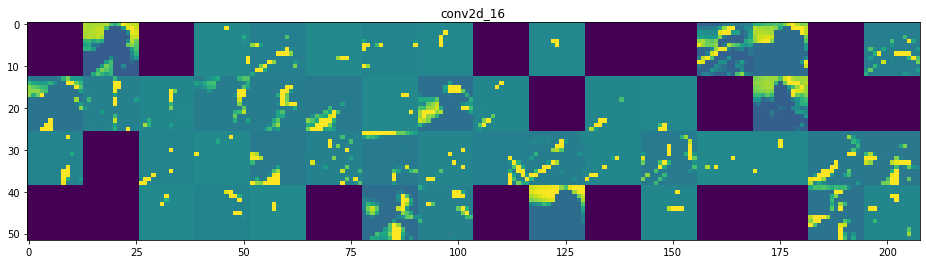

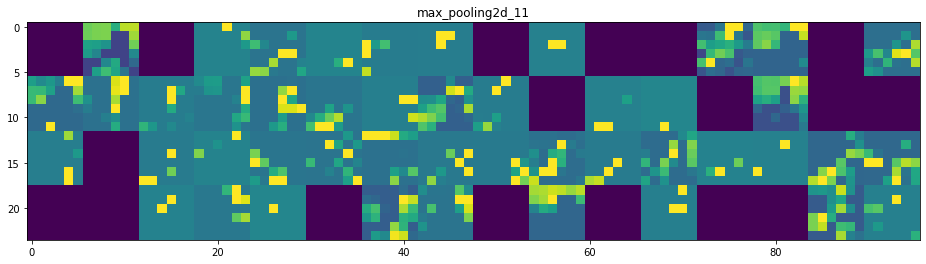

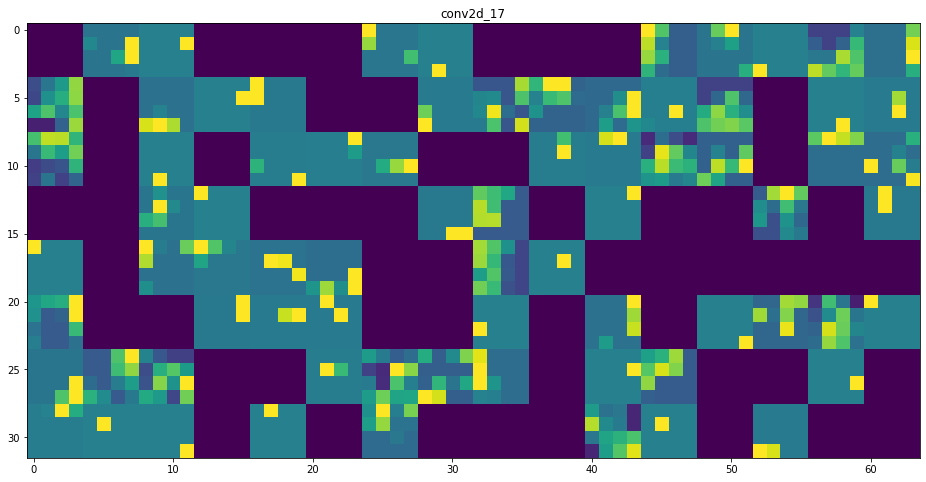

In [8]:
import keras
from keras import layers, models,optimizers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
from skimage import filters
from sklearn.metrics import accuracy_score


x_test = np.load("cifar100_x_test.npy")
y_test = np.load("cifar100_y_test.npy")
img = x_test[0]
img_tensor = x_test[0].reshape(1,x_test.shape[1], x_test.shape[2],x_test.shape[3])

#model_naive = models.load_model('cifar100_basic_cnn.keras')
#model_overfit = models.load_model('cifar100_overfit_cnn.keras')
model_best = models.load_model('cifar100_third_cnn.keras')
#model_vgg16 = models.load_model('cifar100_vgg16_cnn.keras')

plt.imshow(img)
plt.show()

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img_tensor = x_test[0]

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

import matplotlib.pyplot as plt

from keras import models

img_tensor = img_tensor.reshape(1,img_tensor.shape[0],img_tensor.shape[1],img_tensor.shape[2])
# Extracts the outputs of the top 5 layers:
layer_outputs = [layer.output for layer in model_best.layers[:5]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model_best.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model_best.layers[:5]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

#The activations are above
In this image, the activations actually stay pretty relevant throughut the convolutional base. It's pretty cool to see the actual output of the layers. 

In my opinion, the most discernable features for my eyes is in the layer labelled conv2d_15. In the very first image of the training set, I have no clue what the object is, but it looks like a volcano in the top middle image that is printed in that conv2d_15 layer. It made sense because of these activations. As I got down further into the network, the less I could tell what features were being extracted and responded to. I enjoyed this project a lot, even though my super-customized network did worse on the test accuracy than the one I built that overfit the training set by a long shot. 